   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

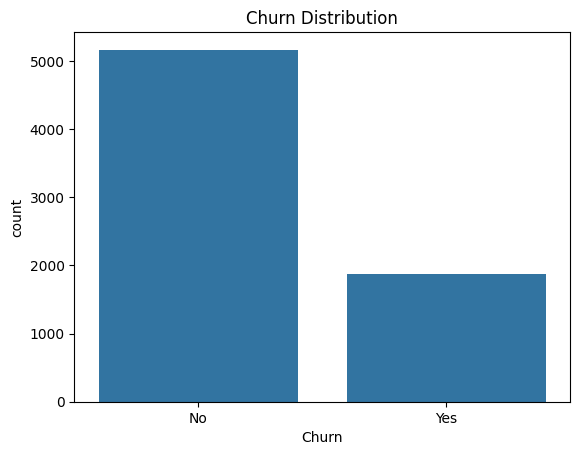

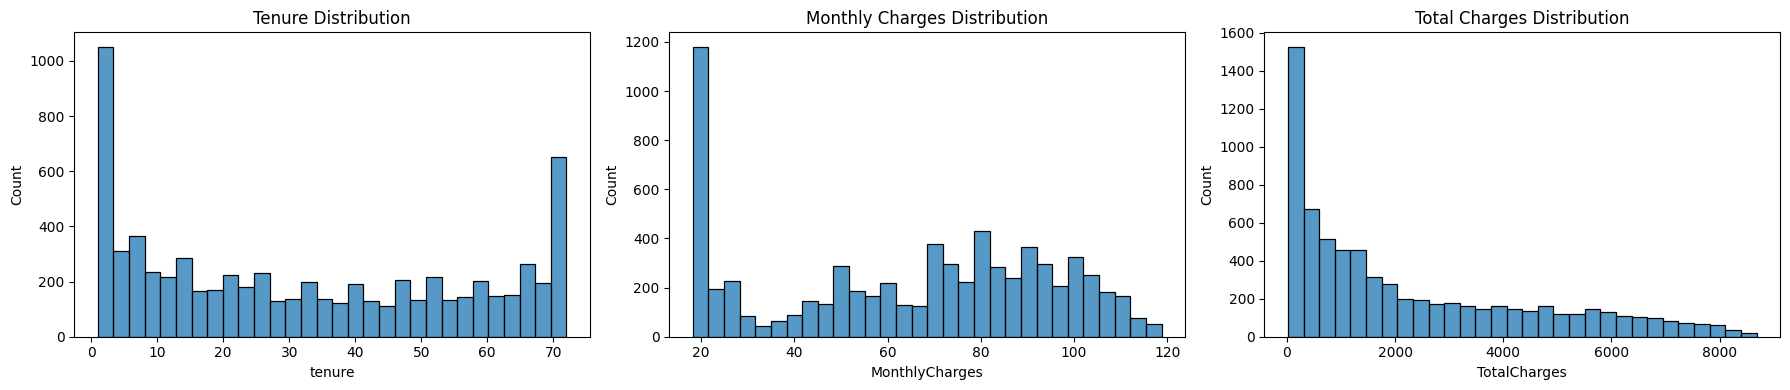

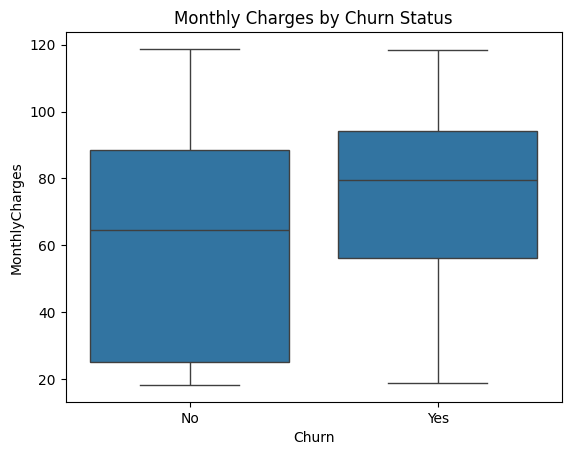

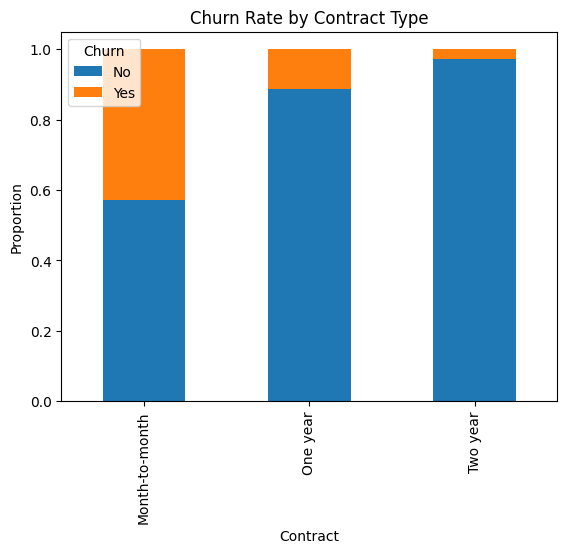

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/Users/ekaterinasharifullina/Documents/my_env/programming/churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Quick peek
print(df.head())
print(df.info())
print(df.describe(include='all'))

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df[df['TotalCharges'].notna()]
df.reset_index(drop=True, inplace=True)

# Drop ID column (not useful)
df.drop('customerID', axis=1, inplace=True)


sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df['tenure'], bins=30, ax=axes[0])
axes[0].set_title('Tenure Distribution')

sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

sns.histplot(df['TotalCharges'], bins=30, ax=axes[2])
axes[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()


sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()


ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.show()



